In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np

In [11]:
# Define the encoder
encoder = models.Sequential([
    layers.Input(shape=(784,)),          # Input is 784-dim flattened image
    layers.Dense(128, activation='relu'),  # Encoding to 128-dim
    layers.Dense(64, activation='relu')  # Encoding to 64-dim
])

# Define the decoder
decoder = models.Sequential([
    layers.Input(shape=(64,)),            # Input is 64-dim encoded vector
    layers.Dense(128, activation='relu'),  # Decode to 128-dim
    layers.Dense(784, activation='sigmoid')  # Decode back to 784 pixels
])

# Combine them to create the autoencoder
autoencoder = models.Sequential([
    encoder,
    decoder
])

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_9 (Sequential)       │ (None, 64)             │       108,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_10 (Sequential)      │ (None, 784)            │       109,456 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,192 (852.31 KB)

 Trainable params: 218,192 (852.31 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Example: using MNIST dataset
from tensorflow.keras.datasets import mnist
import numpy as np

# Load data
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))


In [13]:

# Train
autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.3200
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1298
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1087
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0999
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0954
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0920
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0893
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0872
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0856
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0841
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0827
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0817
Epoch 13/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0809
Epoch 14/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0803
Epoch 15/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s

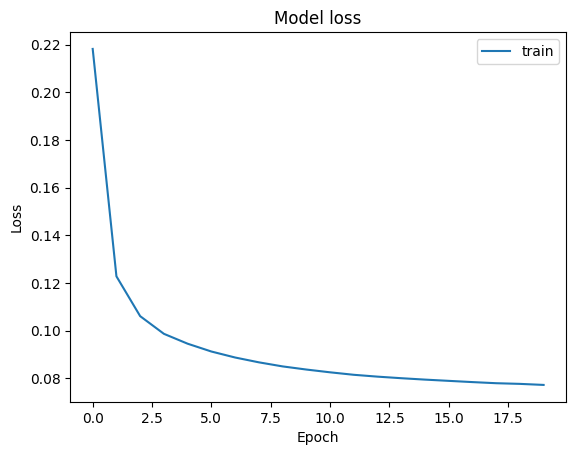

In [15]:
# Plot the loss
import matplotlib.pyplot as plt
history = autoencoder.history.history
plt.plot(history['loss'], label='train')
# plt.plot(history['val_loss'], label='test')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [16]:
# Encode some images
encoded_imgs = encoder.predict(x_test)
# Decode them
decoded_imgs = decoder.predict(encoded_imgs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


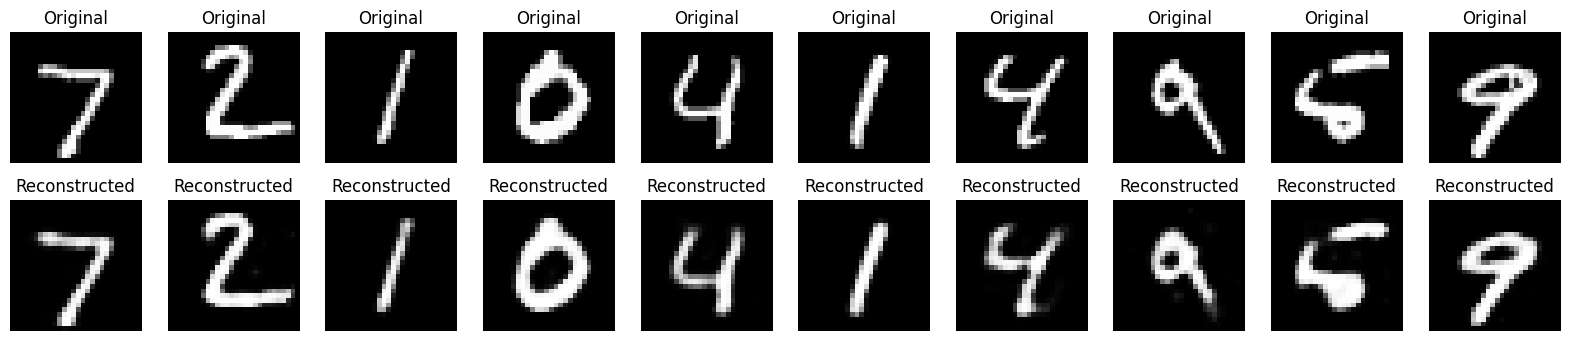

In [17]:
# Plot the first 10 decoded images
plt.figure(figsize=(20, 4))
for i in range(10):
    # Display original
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display reconstruction
    ax = plt.subplot(2, 10, i + 11)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()